# Question 2:

In [160]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import scipy.linalg as scln
from scipy.spatial import distance
import numpy.linalg as nplin
import pandas as pd  
import math

In [161]:
def landmarkcord(a, k, radius):
    landmark = []
    phi = np.random.uniform(-math.pi,math.pi,1)
    theta = np.linspace(0,2*math.pi,k,endpoint=False)
    for i in range(0,k):
        x = radius*math.cos(theta[i]+phi)+a[0]
        y = radius*math.sin(theta[i]+phi)+a[1]
        landmark.append([x,y])
    return landmark

In [162]:
def distance(a,b,norm=1):
    d = []
    norm = 1
    for i in range(0,len(a)):
        d.append((abs(a[i]-b[i]))**(norm))
    dist = (sum(np.array(d)))**(1/(norm))
    return dist

In [163]:
def sampling(noisesigma, Xtrue, landmark):
    Ri = []
    for i in landmark:
        ri = 0
        di = distance(Xtrue,i)
        while(ri<=0):
            n = np.random.normal(0, noisesigma)
            ri = di+n
        Ri.append(ri)
    return Ri

In [164]:
def truepoint(a,radius):
    x = np.random.uniform((a[0]-radius),(a[0]+radius),1)
    y = np.random.uniform((a[1]-radius),(a[1]+radius),1)
    X = [x,y]
    return X

In [165]:
def generation(ri, Xk, sigma, sigmanoise, X):
    X = X.reshape(1,2)
    di = []
    for i in Xk:
        d = distance([X[0,0],X[0,1]],i)
        di.append(d)
    ri = np.array(ri)
    di = np.array(di)
    sub = ri - di
    sub = sum(sub**2)
    cov = np.matrix([[sigma[0]**2,0],[0,sigma[1]**2]])
    pprior = -(1/2)*np.matmul(X,np.matmul(cov.I,X.T))
    likelihood = -(1/(2*sigmanoise))*sub
    Z = -(likelihood+pprior[0,0])
    return Z
    

In [166]:
def localization(landmarkcount, priorsigma,noisysig):
    a = [.2,.3]
    sigma =  priorsigma
    limit = [-2,2]
    radius = 1
    noisesigma = noisysig
    k = landmarkcount
    Xtrue = truepoint(a,radius)
    xtrue = Xtrue[0]
    ytrue = Xtrue[1]
    Xtrue = [xtrue[0],ytrue[0]]
    landmark =  landmarkcord(a, k, radius)
    ri = sampling(noisesigma, Xtrue, landmark)
    print("the range vale with the true meserement is: ",ri)
    print("co-ordinates of the landmark are: ",landmark)
    print("ture value of the goal: ",Xtrue)
    x = np.linspace(-2,2,50)
    y = np.linspace(-2,2,50)
    Y = []
    Z = []
    for i in x:
        for j in y:
            Y.append([i,j])
    Y = np.array(Y)
    for i in Y:
        z = generation(ri, landmark, sigma, noisesigma, i)
        Z.append(z)

    predicted = Y[np.argmin(Z)]
    print("map estimate is: ",predicted)

    Zi = np.array(Z)
    Zi = Zi.reshape(50,50)

    xx = np.array(Y[:,0])
    xx = xx.reshape(50,50)

    yy = np.array(Y[:,1])
    yy = yy.reshape(50,50)

    fig,ax=plt.subplots(1,1,figsize=(15,10))
    cp = ax.contourf(xx, yy, Zi,levels = 50)
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.set_title('localisation Contours Plot')
    ax.set_xlabel('x (cm)')
    ax.set_ylabel('y (cm)')
    plt.scatter(Xtrue[0],Xtrue[1],s=10**2,marker = '+',color = 'red', label = "original true value")
    ref = np.array(landmark)
    plt.scatter(ref[:,0],ref[:,1],s=10**2,marker = 'o',color = 'purple', label = "landmarks")
    plt.scatter(predicted[0],predicted[1],s=10**2,marker = '^',color = 'yellow',label = "MAP estimated")
    plt.legend(loc=2)
    plt.show()

the range vale with the true meserement is:  [1.767726554789353, 2.4843755860903487, 0.8219570308498239, 0.8275839908453831]
co-ordinates of the landmark are:  [[-0.6699488454033087, 0.7931419738588983], [-0.29314197385889823, -0.5699488454033086], [1.0699488454033086, -0.1931419738588983], [0.6931419738588984, 1.1699488454033085]]
ture value of the goal:  [0.9403840425826182, 0.5713082973720693]
map estimate is:  [0.6122449  0.36734694]


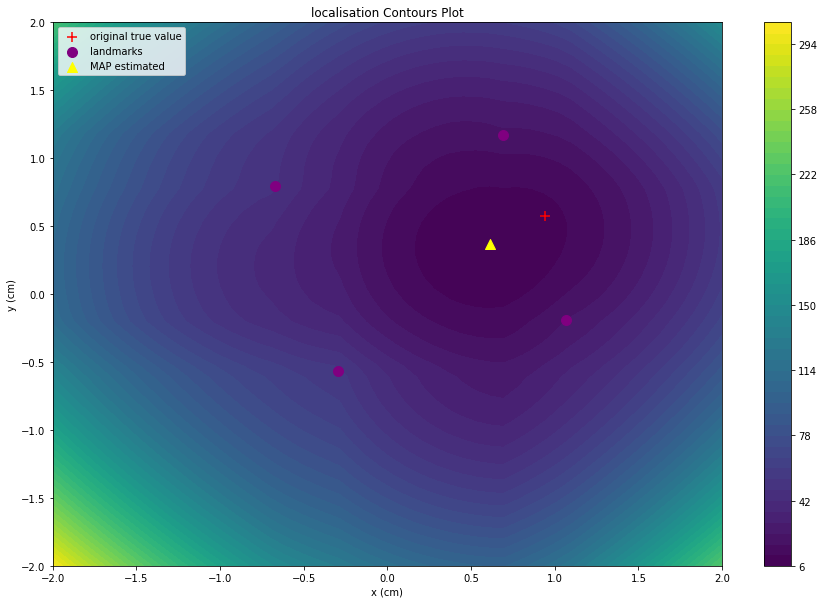

In [167]:
k = 4
noisysig = .1
priorsigma = [.25,.25]
localization(k, priorsigma, noisysig)

the range vale with the true meserement is:  [0.3815293465286156, 1.7438261233294188, 1.8093838430142655]
co-ordinates of the landmark are:  [[0.7245305511745612, 0.6892426861524804], [-0.9591669511679535, 0.2828405200588713], [0.23463639999339234, -0.9720832062113515]]
ture value of the goal:  [0.48017122016314207, 0.6442544420528902]
map estimate is:  [0.36734694 0.44897959]


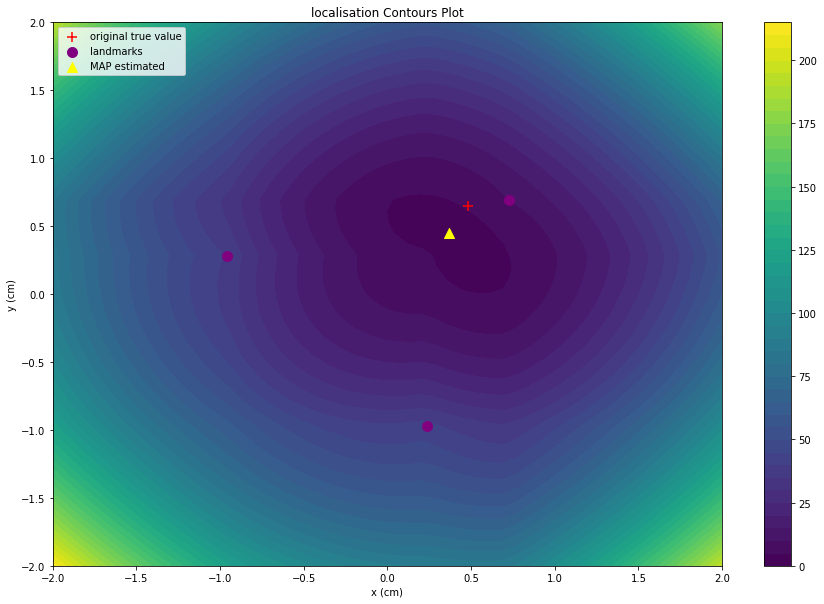

In [150]:
k = 3
noisysig = .1
priorsigma = [.25,.25]
localization(k, priorsigma,noisysig)

the range vale with the true meserement is:  [1.8114960528737174, 0.5547447135116739]
co-ordinates of the landmark are:  [[0.2914031420431155, -0.9566003391215162], [-0.2914031420431154, 0.9566003391215162]]
ture value of the goal:  [0.007404274555380397, 0.6733091875068462]
map estimate is:  [-0.20408163  0.20408163]


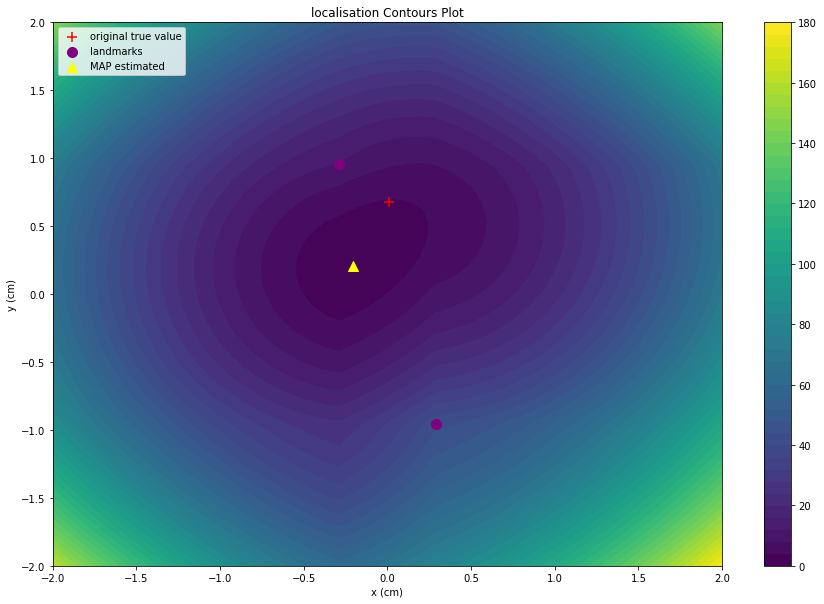

In [153]:
k = 2
noisysig = .1
priorsigma = [.25,.25]
localization(k, priorsigma,noisysig)

the range vale with the true meserement is:  [2.25894700941184]
co-ordinates of the landmark are:  [[-0.6386220147524246, -0.2447137930809023]]
ture value of the goal:  [0.9702848477647799, 0.36399629281273294]
map estimate is:  [0.36734694 0.36734694]


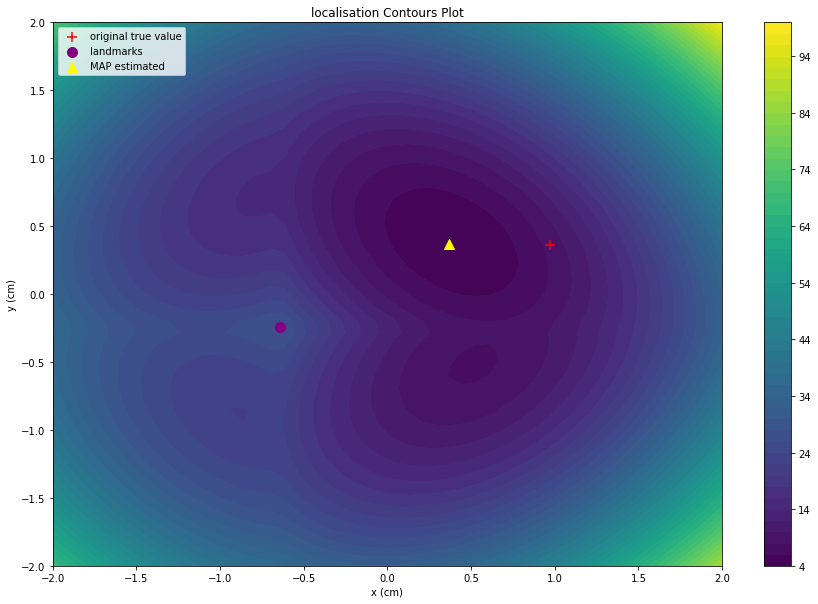

In [168]:
k = 1
noisysig = .1
priorsigma = [.25,.25]
localization(k, priorsigma,noisysig)

# As the number of landmark increases the MAP estimate becomes more accurate to the true point and the certainity also increases. This can be seen as the size of the inner most circle in the contour reduces in size as we increase the number of landmarks, this represents the certainity with which MAP estimator estimates the true goal point location using the range measurement value from landmarks.

# Here we are generating random position of true point and landmarks. 
Sigma x = sigma y = 0.25
Sigma_noise = .1
Number of landmarks increases from 1 to 4
The scheme of generating landmark is to find K equidistant points on a circle of (0,0) center and unit radius.
